# Scikit-learn 3

Linear regression, regression metrics, polynomial features

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Linear Regression


Fitting a linear regression model means to find optimal values for all coefficients and an intercept. A line is fitted to the training data so that the distance of each data point to the line is minimized. This is called "least squares solution" and the problem can be solved in **closed form**.

**Samples with 1 feature each**

As a first step, we generate some data where inputs in `X` have one single feature each, and `y` values are single numbers as well:

In [0]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

def output_y(x):
    return 2.0 * x + 1.0

# 10 data samples, each with one feature
X = np.arange(10)
y = output_y(X)

X = X.reshape(10, 1)

print(X)
print(y)

linreg.fit(X, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

After fitting, access parameters of this model, stored in `coef_` and `intercept_`:

In [0]:
print(linreg.coef_)
print(linreg.intercept_)

[2.]
1.0000000000000053


Which is _very_ close to the actual function that generated the `y` values (y = 2x + 1). Let's visualize the data:

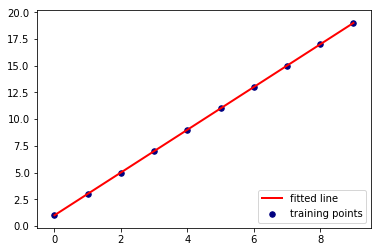

In [0]:
plt.plot(X, linreg.predict(X), color='red', linewidth=2, label="fitted line")
plt.scatter(X, output_y(X), color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.show()

**Different example: Several features for each sample**

Next, using the Boston House data set (has 13 different features), fit a different linear regression model. Load the boston house pricing data set:

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

Assign the data to X and y, and split the data into training and testing parts (using a function that you import from `scikit-learn`). Assign to the following variables: `X_train, X_test, y_train, y_test`.

In [0]:
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Check the shapes of all resulting variables:

In [0]:
for v in (X_train, y_train, X_test, y_test):
    print(v.shape)

(404, 13)
(404,)
(102, 13)
(102,)


Train a linear regression model:

In [0]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Make sure to print the estimator itself to check all hyperparameters:

In [0]:
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Check parameters of this model again, stored in `coef_` and `intercept_`:

In [0]:
print(linreg.coef_)
print(linreg.intercept_)

[-1.11961892e-01  4.56636350e-02 -5.34259613e-03  3.26042786e+00
 -1.89817367e+01  3.95720360e+00 -6.86807411e-03 -1.49963898e+00
  2.88746154e-01 -1.04481630e-02 -9.47025035e-01  9.81904601e-03
 -4.67381954e-01]
35.46835537548566


Use the fitted linear model to make predictions for the samples in `X_test`:

In [0]:
y_pred = linreg.predict(X_test)

Print the first sample in `X_test`, and the first prediction by the model:

In [0]:
X_test[0], y_pred[0]

(array([4.011e-02, 8.000e+01, 1.520e+00, 0.000e+00, 4.040e-01, 7.287e+00,
        3.410e+01, 7.309e+00, 2.000e+00, 3.290e+02, 1.260e+01, 3.969e+02,
        4.080e+00]), 36.27908519768203)

Doing the math manually to check the result:

In [0]:
sum = 0.0

for feature, coef in zip(X_test[0], clf.coef_):
    sum += feature * coef

sum += linreg.intercept_
sum

### Linear Regression can only approximate linear functions

Linear regression is restricted to linear solutions:

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


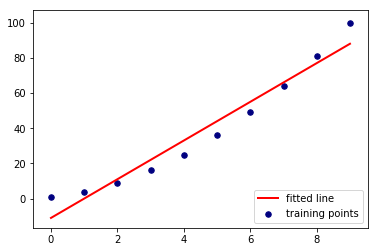

In [0]:
linreg = LinearRegression()

def output_y(x):
    return 2.0 * x + 1.0 + x **2

# 10 data samples, each with one feature
X = np.arange(10)
y = output_y(X)

X = X.reshape(10, 1)

print(X)
print(y)

linreg.fit(X, y)

plt.plot(X, linreg.predict(X), color='red', linewidth=2, label="fitted line")
plt.scatter(X, output_y(X), color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.show()

See **Section 3 Polynomial Features** for how to make linear regression perform well with this data set.

## 2 Evaluation metrics for a regression problem

For a _regression_ problem, accuracy is not a meaningful measure of performance.

**Question for you: Why?**

In [0]:
# make sure correct data set and classifier is used
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

### Mean absolute error (MAE)

A popular and simple way to evaluate regression models are variants of **mean error**. For each pair of true y value of predicted value, **"error" simply means the difference between the true and predicted value. Of all those error values, you can simply take the mean**.

Write a function that implements mean absolute error:

Compare your implementation to `scikit-learn`:

In [0]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

What is the lowest possible error and how can we quickly test that?

**Question for you: what is the highest possible mean absolute error?**

### Mean squared error (MSE)

Mean absolute error gives equal weight for errors of any size. But intuitively, errors can be small or large, and large deviations from the true values are worse than almost getting the correct result. **Mean squared error** puts this idea into practice. Incidentally, squaring the differences also gets rid of negative error values.

In [0]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

### Root mean squared error (RMSE)

Finally, you can take the root of the mean squared error (RMSE), as follows. RMSE is an important measure of regression error, and relatively easy, as long as you remember to apply everything backwards (compute error, square the differences, then take the mean, then take the square root).

In [0]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Taking the square root at the very end is similar to taking the square root to obtain standard deviation from variance.

## 3 Polynomial Features

To fit something else than a straight line, or hyperplane for more than one feature, the best method is to define new features that are higher-order polynomials of the regression function:

In [0]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(3).reshape(3, 1)
print(X)
poly = PolynomialFeatures(2)
# for inputs that have one single feature, a,  outputs are [1., a^1, a^2]
poly.fit_transform(X)

In [0]:
X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(2)
# for inputs that have two featurea, [a, b] ,  outputs are [1., a^1, b^1, a^2, a*b, b^2]
# a*b is a so-called "interaction feature"
poly.fit_transform(X)

Modifying the original example to add polynomial features:

In [0]:
linreg = LinearRegression()
poly = PolynomialFeatures(2)

def output_y(x):
    return 2.0 * x + 1.0 + x **2

# 10 data samples, each with one feature
X = np.arange(10)
y = output_y(X)

X = X.reshape(10, 1)

def predict(X):
    return linreg.predict(poly.fit_transform(X))

print(X)
print(y)

X_transformed = poly.fit_transform(X)

linreg.fit(X_transformed, y)

plt.plot(X, predict(X), color='red', linewidth=2, label="poly degree 2")
plt.scatter(X, output_y(X), color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.show()

**Bigger example showcasing several degrees**

In [0]:
# adapted from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

print("\tX\t\t\tY")
for x_, y_ in zip(x, y):
    print("\t%s\t%s" % (x_, y_))

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'red', 'gold', "blue", "black"]
lw = 2
plt.plot(x_plot, f(x_plot), color='yellowgreen', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([1, 3, 5]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()